# Hotel Data Analysis Report

Compile collection Excel sheets into a single dataset
Create a simple linear regression between average daily rate and lead time before booking


In [1]:
# bring libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# import scipy as sp
from scipy.stats import linregress


In [72]:
df1 = pd.read_excel('C:/Users/PSSCO2412/Downloads/Udemy - Python I for Power BI Users - Resource Pack/hotel_revenue_historical_full.xlsx',sheet_name="2018")
df2 = pd.read_excel('C:/Users/PSSCO2412/Downloads/Udemy - Python I for Power BI Users - Resource Pack/hotel_revenue_historical_full.xlsx',sheet_name="2019")
df3 = pd.read_excel('C:/Users/PSSCO2412/Downloads/Udemy - Python I for Power BI Users - Resource Pack/hotel_revenue_historical_full.xlsx',sheet_name="2020")
my_dataset = pd.concat([df1,df2,df3],ignore_index=True)
my_dataset.tail(10)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
141937,City Hotel,1,219,2020,August,35,28,1,3,2,...,No Deposit,9.0,NaN,0,Transient,135.00,0,2,No-Show,2020-08-28
141938,City Hotel,1,320,2020,August,35,28,2,5,2,...,No Deposit,9.0,NaN,0,Transient,112.76,0,3,No-Show,2020-08-29
141939,City Hotel,1,1,2020,March,10,7,0,2,2,...,No Deposit,NaN,NaN,0,Transient,98.00,0,0,No-Show,2020-03-07
141940,City Hotel,1,4,2020,August,35,28,1,0,1,...,No Deposit,NaN,72.0,0,Transient,0.00,0,2,No-Show,2020-08-28
141941,City Hotel,1,2,2020,June,24,11,2,1,1,...,No Deposit,NaN,153.0,0,Transient,95.00,0,0,No-Show,2020-06-11
141942,City Hotel,1,1,2020,February,5,1,0,0,1,...,No Deposit,NaN,153.0,0,Transient,0.00,0,1,No-Show,2020-02-01
141943,City Hotel,1,31,2020,July,29,16,2,0,1,...,No Deposit,NaN,NaN,0,Transient,135.00,0,2,No-Show,2020-07-16
141944,City Hotel,1,25,2020,May,18,6,2,1,1,...,No Deposit,NaN,450.0,0,Transient,125.00,0,0,No-Show,2020-05-06
141945,City Hotel,1,6,2020,July,29,17,1,0,1,...,No Deposit,NaN,238.0,0,Transient,65.00,0,0,No-Show,2020-07-17
141946,City Hotel,1,0,2020,August,31,2,0,2,1,...,No Deposit,NaN,40.0,0,Transient,65.00,0,1,No-Show,2020-08-02


In [3]:
my_dataset.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [4]:
my_dataset['is_canceled'].value_counts(normalize=True)

0    0.627755
1    0.372245
Name: is_canceled, dtype: float64

In [5]:
my_dataset['is_canceled'].value_counts()

0    89108
1    52839
Name: is_canceled, dtype: int64

In [73]:
my_dataset['is_canceled']==1

0         True
1         True
2         True
3         True
4         True
          ... 
141942    True
141943    True
141944    True
141945    True
141946    True
Name: is_canceled, Length: 141947, dtype: bool

In [7]:
my_dataset['is_canceled']!=1

0         False
1         False
2         False
3         False
4         False
          ...  
141942    False
141943    False
141944    False
141945    False
141946    False
Name: is_canceled, Length: 141947, dtype: bool

In [78]:
my_dataset[my_dataset['is_canceled']!=1]
my_dataset.to_csv('Data_Table.csv')

In [77]:
filtered_data = my_dataset[my_dataset['is_canceled']!=1]
filtered_data.to_csv('filtered_hotel_dataset.csv')

In [10]:
filtered_data[filtered_data['is_canceled']!=1]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
7951,Resort Hotel,0,342,2018,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2018-07-01
7952,Resort Hotel,0,737,2018,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2018-07-01
7953,Resort Hotel,0,7,2018,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2018-07-02
7954,Resort Hotel,0,13,2018,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2018-07-02
7955,Resort Hotel,0,14,2018,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2018-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141594,City Hotel,0,23,2020,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2020-09-06
141595,City Hotel,0,102,2020,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2020-09-07
141596,City Hotel,0,34,2020,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2020-09-07
141597,City Hotel,0,109,2020,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2020-09-07


In [11]:
filtered_data[filtered_data['is_canceled']==0]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
7951,Resort Hotel,0,342,2018,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2018-07-01
7952,Resort Hotel,0,737,2018,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2018-07-01
7953,Resort Hotel,0,7,2018,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2018-07-02
7954,Resort Hotel,0,13,2018,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2018-07-02
7955,Resort Hotel,0,14,2018,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2018-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141594,City Hotel,0,23,2020,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2020-09-06
141595,City Hotel,0,102,2020,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2020-09-07
141596,City Hotel,0,34,2020,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2020-09-07
141597,City Hotel,0,109,2020,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2020-09-07


In [12]:
filtered_data2 = my_dataset[my_dataset['is_canceled']==1]

In [13]:
filtered_data2[filtered_data2['is_canceled']==1]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,1,85,2018,July,27,1,0,3,2,...,No Deposit,240.0,NaN,0,Transient,82.0,0,1,Canceled,2018-05-06
1,Resort Hotel,1,75,2018,July,27,1,0,3,2,...,No Deposit,15.0,NaN,0,Transient,105.5,0,0,Canceled,2018-04-22
2,Resort Hotel,1,23,2018,July,27,1,0,4,2,...,No Deposit,240.0,NaN,0,Transient,123.0,0,0,Canceled,2018-06-23
3,Resort Hotel,1,60,2018,July,27,1,2,5,2,...,No Deposit,240.0,NaN,0,Transient,107.0,0,2,Canceled,2018-05-11
4,Resort Hotel,1,96,2018,July,27,1,2,8,2,...,No Deposit,NaN,NaN,0,Transient,108.3,0,2,Canceled,2018-05-29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141942,City Hotel,1,1,2020,February,5,1,0,0,1,...,No Deposit,NaN,153.0,0,Transient,0.0,0,1,No-Show,2020-02-01
141943,City Hotel,1,31,2020,July,29,16,2,0,1,...,No Deposit,NaN,NaN,0,Transient,135.0,0,2,No-Show,2020-07-16
141944,City Hotel,1,25,2020,May,18,6,2,1,1,...,No Deposit,NaN,450.0,0,Transient,125.0,0,0,No-Show,2020-05-06
141945,City Hotel,1,6,2020,July,29,17,1,0,1,...,No Deposit,NaN,238.0,0,Transient,65.0,0,0,No-Show,2020-07-17


In [14]:
filtered_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 89108 entries, 7951 to 141598
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   hotel                           89108 non-null  object        
 1   is_canceled                     89108 non-null  int64         
 2   lead_time                       89108 non-null  int64         
 3   arrival_date_year               89108 non-null  int64         
 4   arrival_date_month              89108 non-null  object        
 5   arrival_date_week_number        89108 non-null  int64         
 6   arrival_date_day_of_month       89108 non-null  int64         
 7   stays_in_weekend_nights         89108 non-null  int64         
 8   stays_in_week_nights            89108 non-null  int64         
 9   adults                          89108 non-null  int64         
 10  children                        89108 non-null  float64       
 11

In [15]:
filtered_data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52839 entries, 0 to 141946
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   hotel                           52839 non-null  object        
 1   is_canceled                     52839 non-null  int64         
 2   lead_time                       52839 non-null  int64         
 3   arrival_date_year               52839 non-null  int64         
 4   arrival_date_month              52839 non-null  object        
 5   arrival_date_week_number        52839 non-null  int64         
 6   arrival_date_day_of_month       52839 non-null  int64         
 7   stays_in_weekend_nights         52839 non-null  int64         
 8   stays_in_week_nights            52839 non-null  int64         
 9   adults                          52839 non-null  int64         
 10  children                        52831 non-null  float64       
 11  b

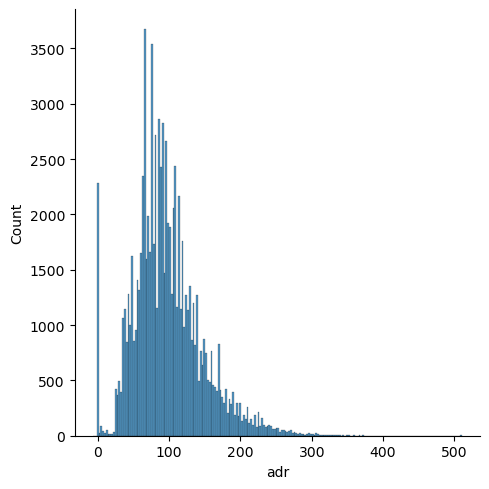

In [16]:
# univiarate and bivariate analysis
sns.displot(filtered_data['adr'])

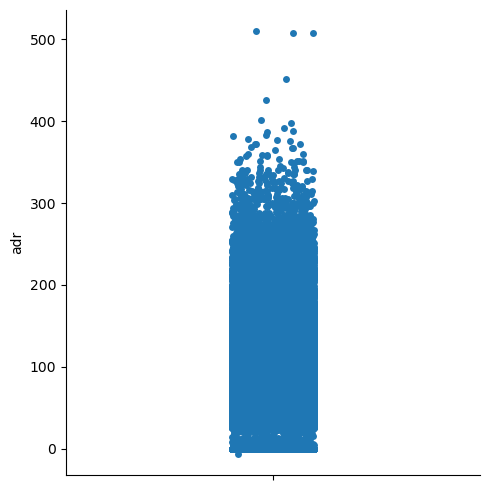

In [17]:
sns.catplot(filtered_data['adr'])

C:\Users\PSSCO2412\AppData\Local\Temp\ipykernel_28272\2184026110.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(filtered_data['adr'])


<Axes: xlabel='adr', ylabel='Density'>

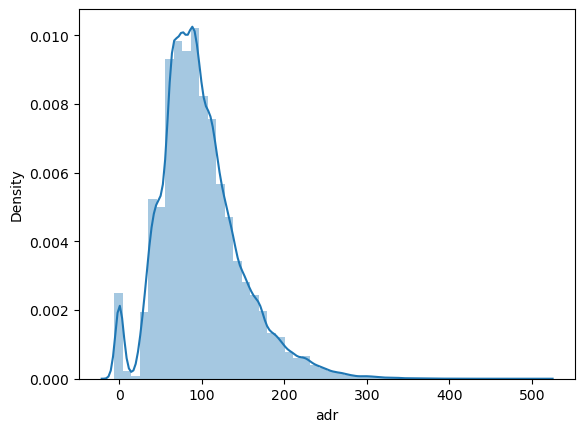

In [18]:
# univiarate and bivariate analysis
sns.distplot(filtered_data['adr'])

C:\Users\PSSCO2412\AppData\Local\Temp\ipykernel_28272\2197940490.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(filtered_data['lead_time'])


<Axes: xlabel='lead_time', ylabel='Density'>

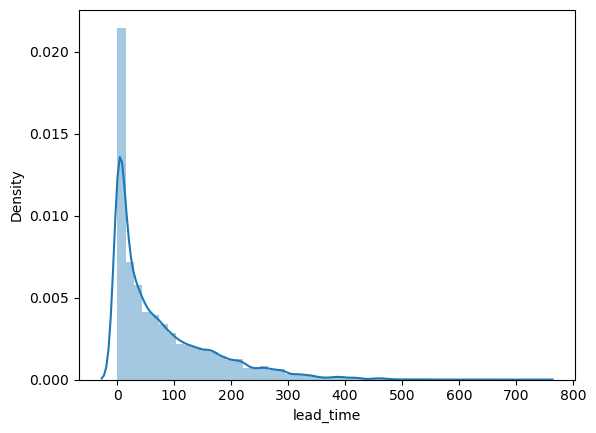

In [19]:
# univiarate and bivariate analysis
sns.distplot(filtered_data['lead_time'])

<Axes: xlabel='lead_time'>

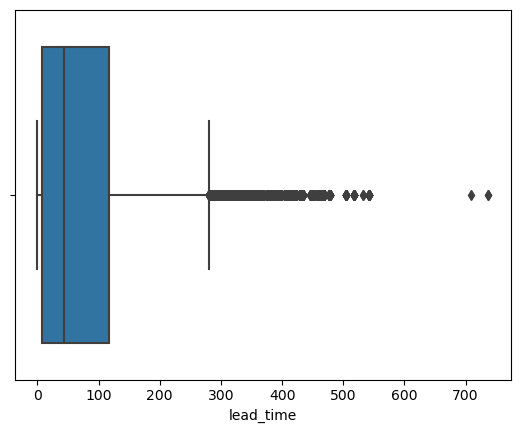

In [20]:
sns.boxplot(x=filtered_data['lead_time'])

<Axes: ylabel='lead_time'>

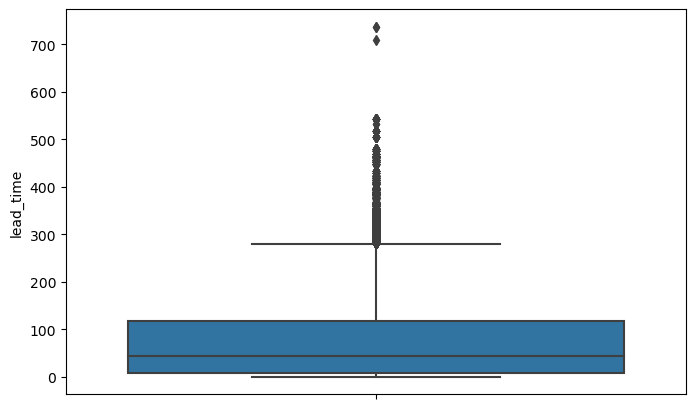

In [21]:
plt.figure(figsize=(8,5))
sns.boxplot(y=filtered_data['lead_time'])

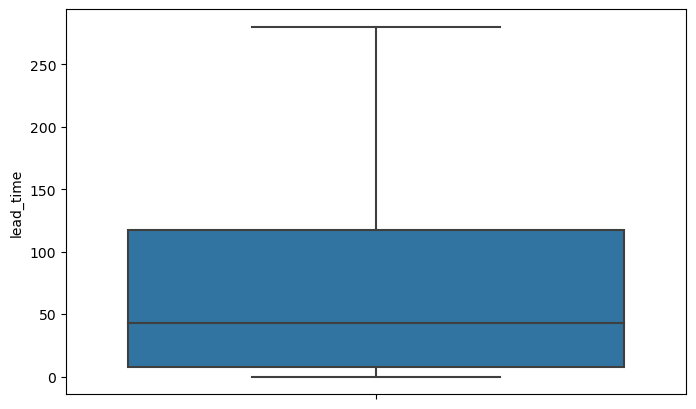

In [22]:
plt.figure(figsize=(8,5))
sns.boxplot(y=filtered_data['lead_time'],showfliers=False);

Text(0.5, 1.0, 'The mean is76.89')

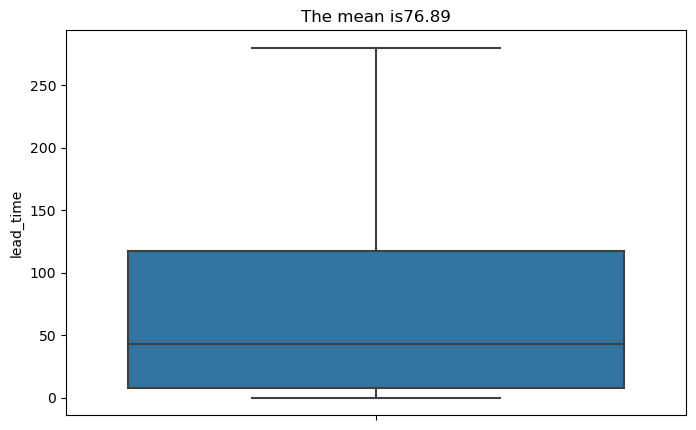

In [23]:
plt.figure(figsize=(8,5))
sns.boxplot(y=filtered_data['lead_time'],showfliers=False);
plt.title(f"The mean is{filtered_data['lead_time'].mean():.2f}")

Text(0.5, 1.0, 'The mean is76.89')

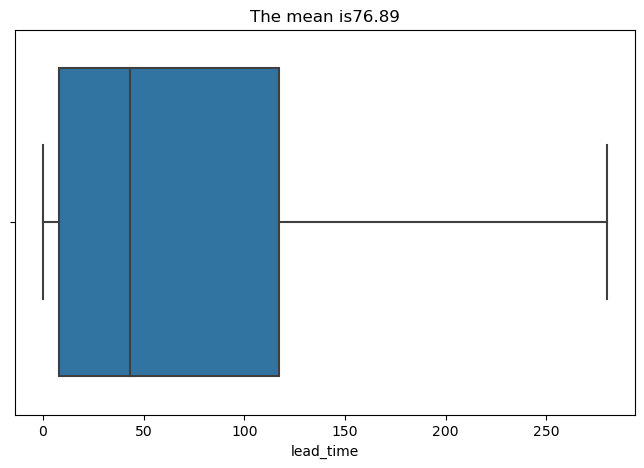

In [24]:
plt.figure(figsize=(8,5))
sns.boxplot(data=filtered_data,x='lead_time',showfliers=False)
plt.title(f"The mean is{filtered_data['lead_time'].mean():.2f}")

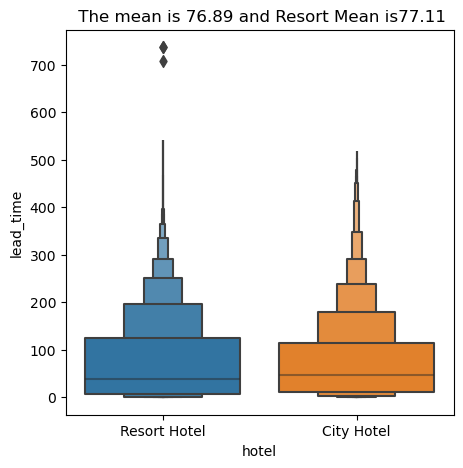

In [25]:
plt.figure(figsize=(5,5))
sns.boxenplot(data=filtered_data,y='lead_time',x='hotel')
resort_mean=filtered_data[filtered_data['hotel']=='Resort Hotel']['lead_time'].mean()
city_mean=filtered_data[filtered_data['hotel']=='City Hotel']['lead_time'].mean()
plt.title(f" The mean is {filtered_data['lead_time'].mean():.2f} and Resort Mean is{resort_mean:.2f}");

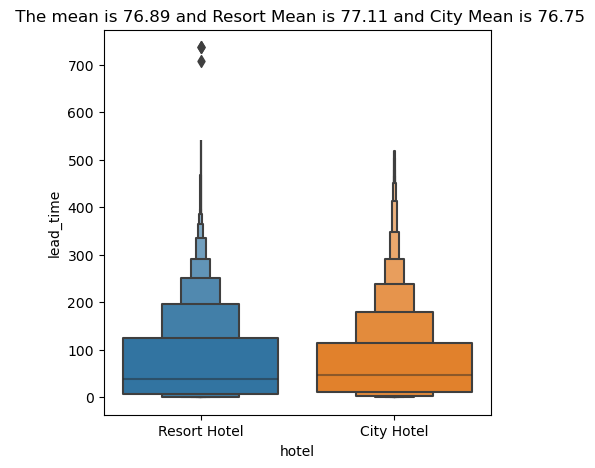

In [26]:
plt.figure(figsize=(5,5))
sns.boxenplot(data=filtered_data,y='lead_time',x='hotel')
resort_mean=filtered_data[filtered_data['hotel']=='Resort Hotel']['lead_time'].mean()
city_mean=filtered_data[filtered_data['hotel']=='City Hotel']['lead_time'].mean()
plt.title(f" The mean is {filtered_data['lead_time'].mean():.2f} and Resort Mean is {resort_mean:.2f} and City Mean is {city_mean:.2f}");

C:\Users\PSSCO2412\AppData\Local\Temp\ipykernel_28272\2237575929.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(filtered_data[filtered_data['hotel']=='City Hotel']['lead_time'])
C:\Users\PSSCO2412\AppData\Local\Temp\ipykernel_28272\2237575929.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distp

<Axes: xlabel='lead_time', ylabel='Density'>

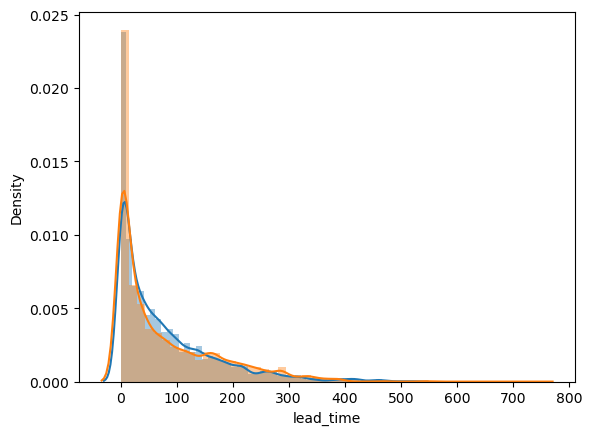

In [27]:
# univiarate and bivariate analysis
sns.distplot(filtered_data[filtered_data['hotel']=='City Hotel']['lead_time'])
sns.distplot(filtered_data[filtered_data['hotel']=='Resort Hotel']['lead_time'])

C:\Users\PSSCO2412\AppData\Local\Temp\ipykernel_28272\1914226851.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(filtered_data[filtered_data['hotel']=='City Hotel']['adr'])
C:\Users\PSSCO2412\AppData\Local\Temp\ipykernel_28272\1914226851.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(fi

<Axes: xlabel='adr', ylabel='Density'>

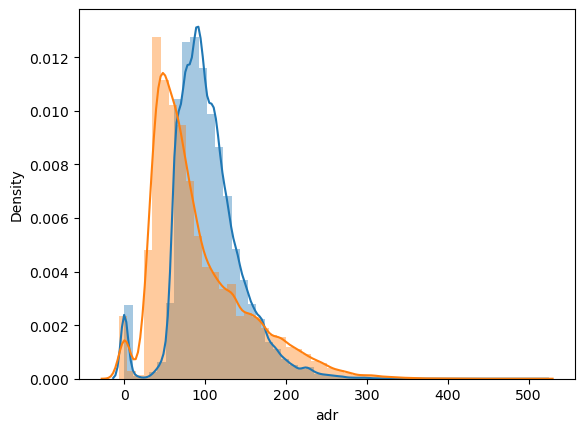

In [28]:
# univiarate and bivariate analysis
sns.distplot(filtered_data[filtered_data['hotel']=='City Hotel']['adr'])
sns.distplot(filtered_data[filtered_data['hotel']=='Resort Hotel']['adr'])

C:\Users\PSSCO2412\AppData\Local\Temp\ipykernel_28272\1681570863.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(filtered_data[filtered_data['hotel']=='City Hotel']['adr'],label='City Hotel')
C:\Users\PSSCO2412\AppData\Local\Temp\ipykernel_28272\1681570863.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

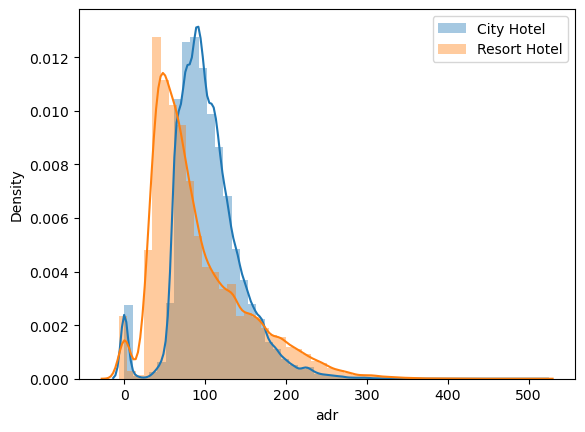

In [29]:
# univiarate and bivariate analysis
sns.distplot(filtered_data[filtered_data['hotel']=='City Hotel']['adr'],label='City Hotel')
sns.distplot(filtered_data[filtered_data['hotel']=='Resort Hotel']['adr'],label='Resort Hotel')
plt.legend()

C:\Users\PSSCO2412\AppData\Local\Temp\ipykernel_28272\1488805428.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(filtered_data[filtered_data['hotel']=='City Hotel']['adr'],label='City Hotel')
C:\Users\PSSCO2412\AppData\Local\Temp\ipykernel_28272\1488805428.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

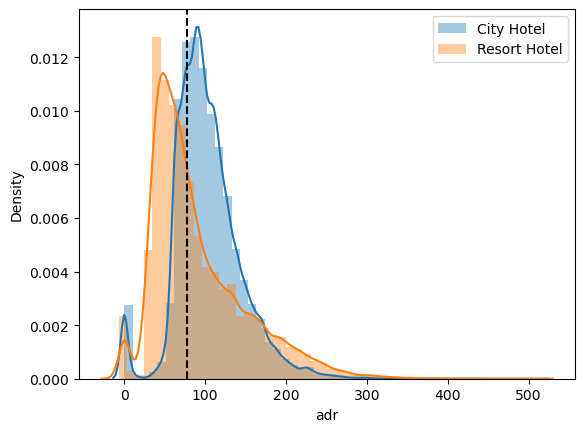

In [30]:
# univiarate and bivariate analysis
sns.distplot(filtered_data[filtered_data['hotel']=='City Hotel']['adr'],label='City Hotel')
sns.distplot(filtered_data[filtered_data['hotel']=='Resort Hotel']['adr'],label='Resort Hotel')
resort_mean=filtered_data[filtered_data['hotel']=='Resort Hotel']['lead_time'].mean()
city_mean=filtered_data[filtered_data['hotel']=='City Hotel']['lead_time'].mean()
plt.axvline(resort_mean,color='black',linestyle="--")
plt.legend()

C:\Users\PSSCO2412\AppData\Local\Temp\ipykernel_28272\551110890.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(filtered_data[filtered_data['hotel']=='City Hotel']['adr'],label='City Hotel')
C:\Users\PSSCO2412\AppData\Local\Temp\ipykernel_28272\551110890.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751



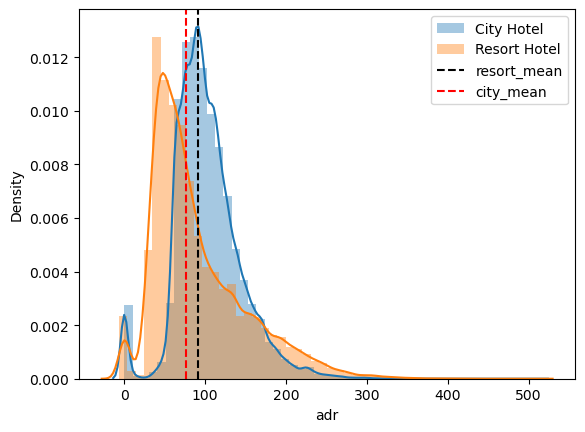

In [31]:
# univiarate and bivariate analysis
sns.distplot(filtered_data[filtered_data['hotel']=='City Hotel']['adr'],label='City Hotel')
sns.distplot(filtered_data[filtered_data['hotel']=='Resort Hotel']['adr'],label='Resort Hotel')
resort_mean=filtered_data[filtered_data['hotel']=='Resort Hotel']['adr'].mean()
city_mean=filtered_data[filtered_data['hotel']=='City Hotel']['lead_time'].mean()
plt.axvline(resort_mean,color='black',linestyle="--",label='resort_mean')
plt.axvline(city_mean,color='red',linestyle="--",label='city_mean')
plt.legend()

C:\Users\PSSCO2412\AppData\Local\Temp\ipykernel_28272\4200308507.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(filtered_data[filtered_data['hotel']=='City Hotel']['adr'],label='City Hotel')
C:\Users\PSSCO2412\AppData\Local\Temp\ipykernel_28272\4200308507.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

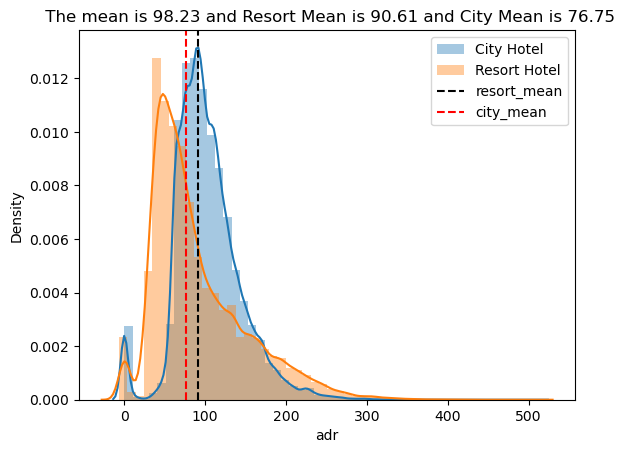

In [32]:
# univiarate and bivariate analysis
sns.distplot(filtered_data[filtered_data['hotel']=='City Hotel']['adr'],label='City Hotel')
sns.distplot(filtered_data[filtered_data['hotel']=='Resort Hotel']['adr'],label='Resort Hotel')
resort_mean=filtered_data[filtered_data['hotel']=='Resort Hotel']['adr'].mean()
city_mean=filtered_data[filtered_data['hotel']=='City Hotel']['lead_time'].mean()
plt.axvline(resort_mean,color='black',linestyle="--",label='resort_mean')
plt.axvline(city_mean,color='red',linestyle="--",label='city_mean')
plt.title(f" The mean is {filtered_data['adr'].mean():.2f} and Resort Mean is {resort_mean:.2f} and City Mean is {city_mean:.2f}");
plt.legend()
plt.savefig('ADR_Distribution.png')

<Axes: xlabel='adr', ylabel='lead_time'>

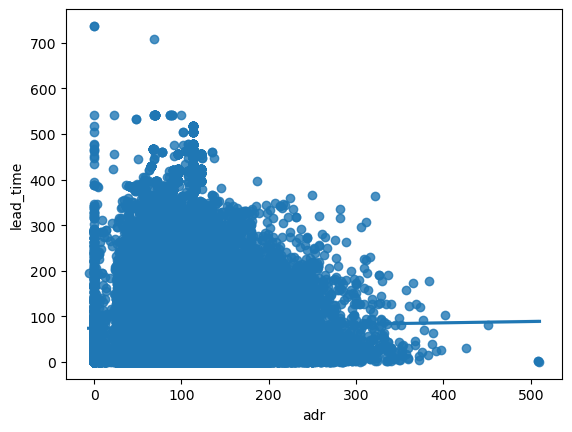

In [33]:
# bivariate analysis and linear regression
sns.regplot(data = filtered_data,x='adr',y='lead_time')

<Axes: xlabel='adr', ylabel='lead_time'>

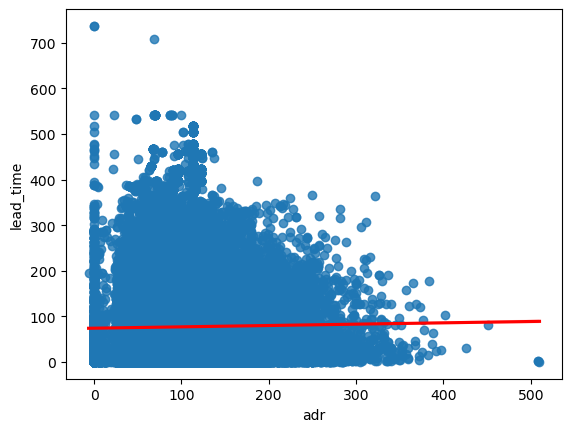

In [34]:
# bivariate analysis and linear regression
sns.regplot(data = filtered_data,x='adr',y='lead_time',line_kws={'color':'red'})

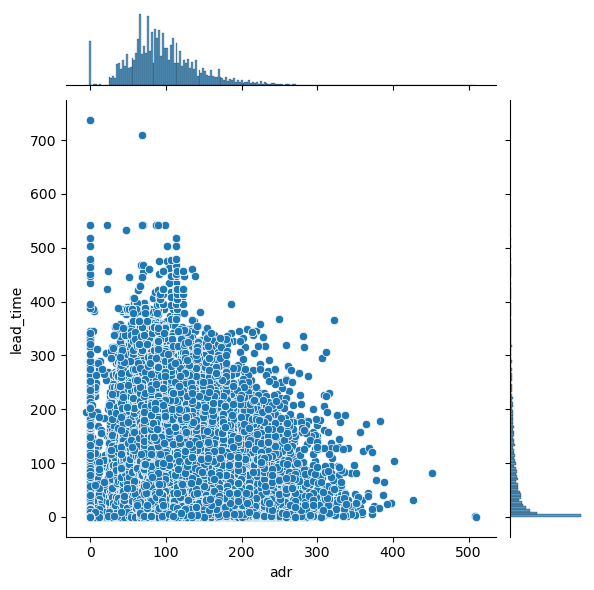

In [35]:
# bivariate analysis and linear regression
sns.jointplot(data = filtered_data,x='adr',y='lead_time')

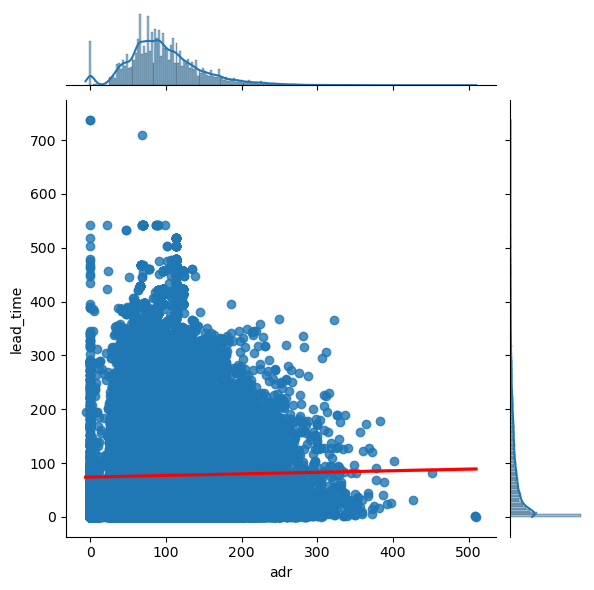

In [36]:
# bivariate analysis and linear regression
sns.jointplot(data = filtered_data,x='adr',y='lead_time',line_kws={'color':'red'},kind='reg')

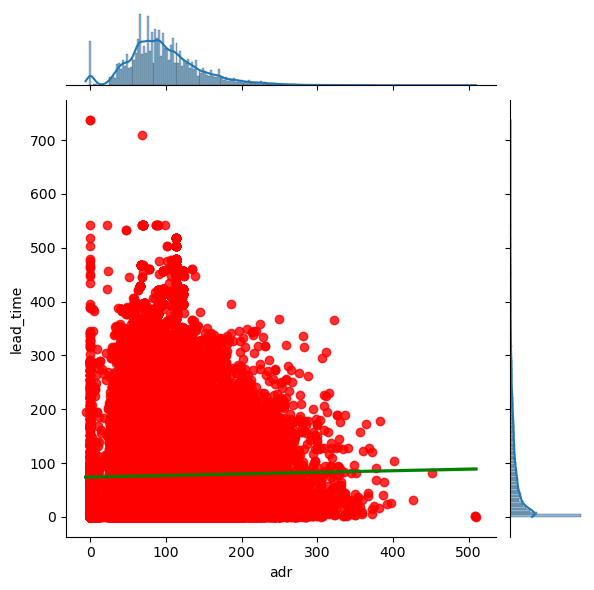

In [37]:
# bivariate analysis and linear regression
sns.jointplot(data = filtered_data,x='adr',y='lead_time',line_kws={'color':'green'},kind='reg',joint_kws={'color':'red'})

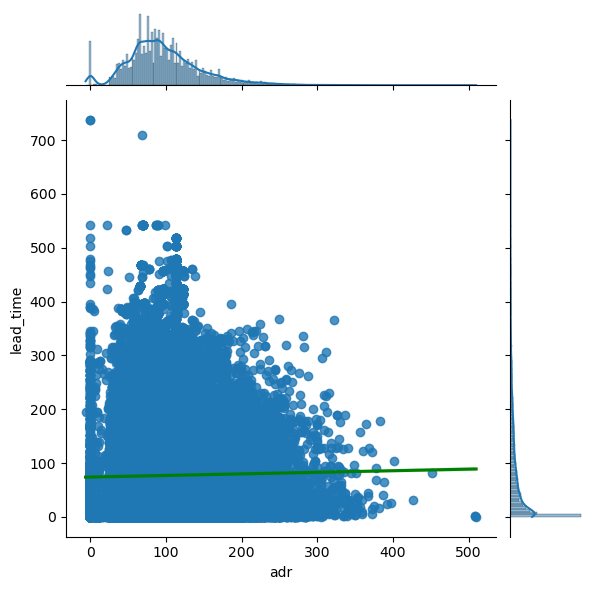

In [38]:
# bivariate analysis and linear regression
sns.jointplot(data = filtered_data,x='adr',y='lead_time',line_kws={'color':'green'},kind='reg',joint_kws={'line_kws':{'color':'red'}})

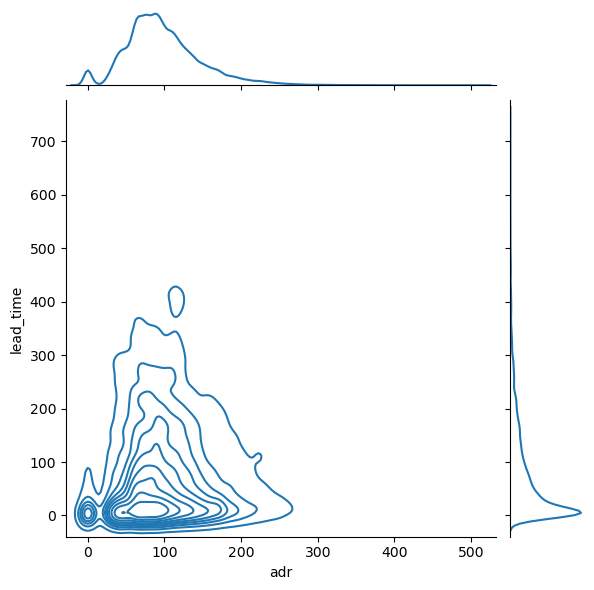

In [39]:
# bivariate analysis and linear regression
sns.jointplot(data = filtered_data,x='adr',y='lead_time',kind='kde')

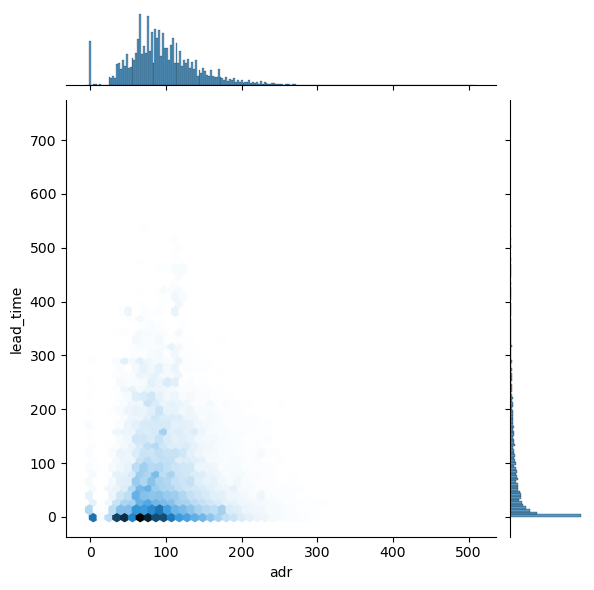

In [40]:
# bivariate analysis and linear regression
sns.jointplot(data = filtered_data,x='adr',y='lead_time',kind='hex')

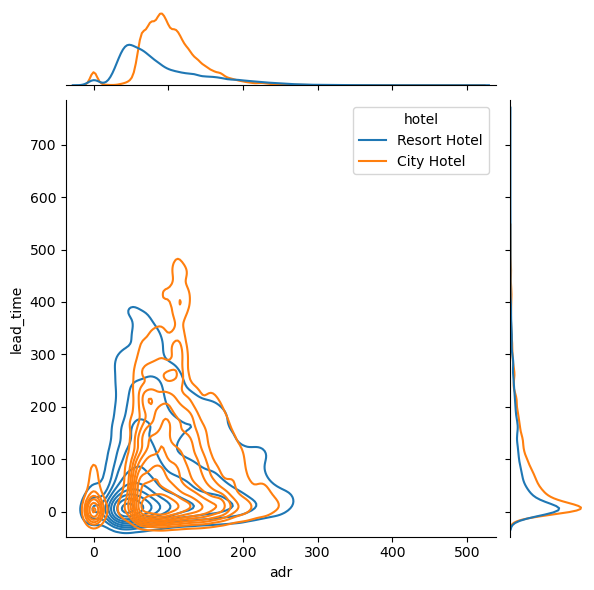

In [41]:
# bivariate analysis and linear regression
sns.jointplot(data = filtered_data,x='adr',y='lead_time',kind='kde',hue='hotel')

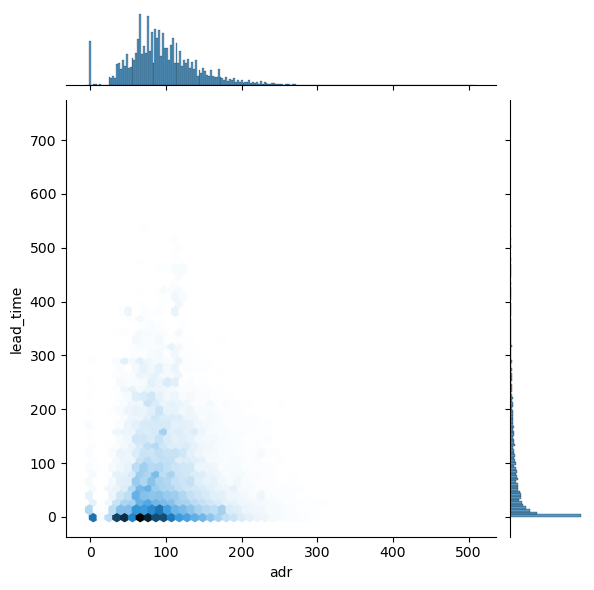

In [42]:
# bivariate analysis and linear regression
sns.jointplot(data = filtered_data,x='adr',y='lead_time',kind='hex')

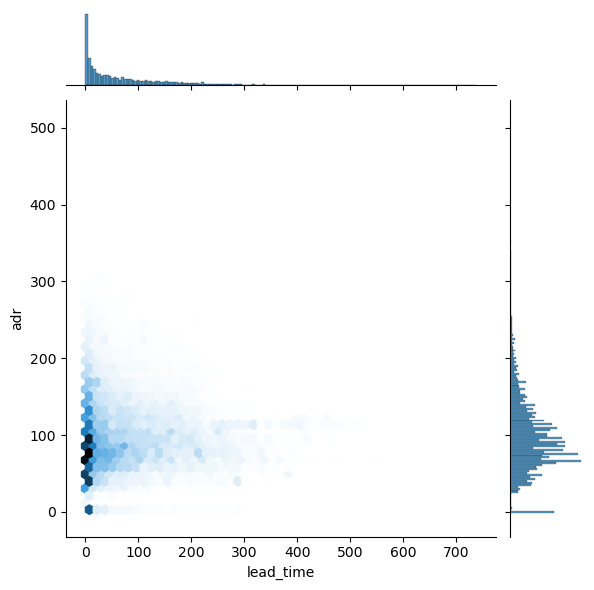

In [43]:
# bivariate analysis and linear regression
sns.jointplot(data = filtered_data,y='adr',x='lead_time',kind='hex')

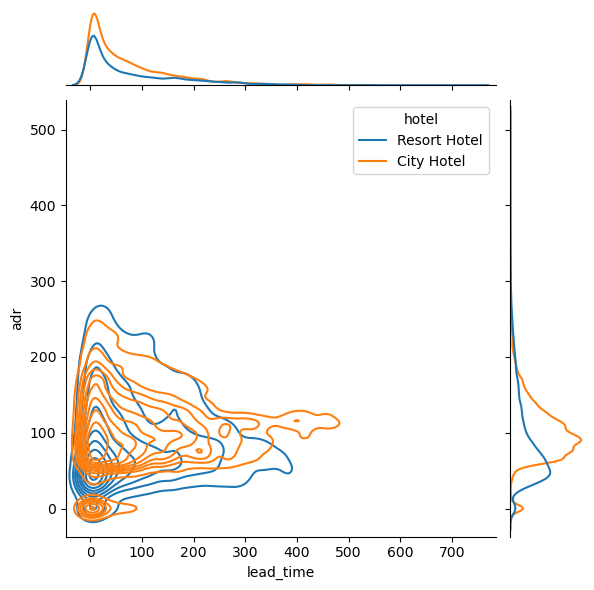

In [44]:
# bivariate analysis and linear regression
sns.jointplot(data = filtered_data,x='lead_time',y='adr',kind='kde',hue='hotel')

In [51]:
# Linear Regression
from scipy.stats import linregress
linregress(filtered_data['lead_time'],filtered_data['adr'])

LinregressResult(slope=0.00885584393059344, intercept=97.54811713144225, rvalue=0.016122313985460025, pvalue=1.4874734271358798e-06, stderr=0.001839893371979956, intercept_stderr=0.215970006450331)

In [55]:
# isolating slope
linregress(filtered_data['lead_time'],filtered_data['adr'])[0]

0.00885584393059344

In [56]:
# isolating intercept
linregress(filtered_data['lead_time'],filtered_data['adr'])[1]

97.54811713144225

In [57]:
# isolating pvalue
linregress(filtered_data['lead_time'],filtered_data['adr'])[3]

1.4874734271358798e-06

In [64]:
slope=linregress(filtered_data['lead_time'],filtered_data['adr'])[0]
intercept=linregress(filtered_data['lead_time'],filtered_data['adr'])[1]
r2=linregress(filtered_data['lead_time'],filtered_data['adr'])[2]

In [66]:
slope=linregress(filtered_data['lead_time'],filtered_data['adr'])[0]
intercept=linregress(filtered_data['lead_time'],filtered_data['adr'])[1]
r2=linregress(filtered_data['lead_time'],filtered_data['adr'])[2]
regression_table = pd.DataFrame({'Name':['slope','intercept','r2']})  
regression_table

,Name
0,slope
1,intercept
2,r2


In [69]:
slope=linregress(filtered_data['lead_time'],filtered_data['adr'])[0]
intercept=linregress(filtered_data['lead_time'],filtered_data['adr'])[1]
r2=linregress(filtered_data['lead_time'],filtered_data['adr'])[2]
regression_table = pd.DataFrame({'Name':['slope','intercept','r2'],'Values':[slope,intercept,r2]})  
regression_table

,Name,Values
0,slope,0.008856
1,intercept,97.548117
2,r2,0.016122


In [71]:
filtered_data = my_dataset[my_dataset['is_canceled']!=1]
filtered_data.to_csv('filtered_hotel_dataset.csv')